In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fashion_train_df = pd.read_csv("/content/fashion-mnist_train.csv", sep = ",")


In [7]:
fashion_test_df = pd.read_csv("/content/fashion-mnist_test.csv", sep = ",")


In [8]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [13]:
fashion_train_df.shape

(60000, 785)

In [14]:
fashion_test_df.shape

(10000, 785)

In [15]:
training = np.array(fashion_train_df, dtype = "float32")

In [16]:
testing = np.array(fashion_test_df, dtype = "float32")

3.0

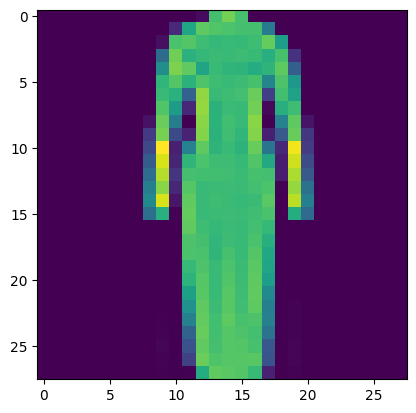

In [44]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
lable = training[i, 0]
lable

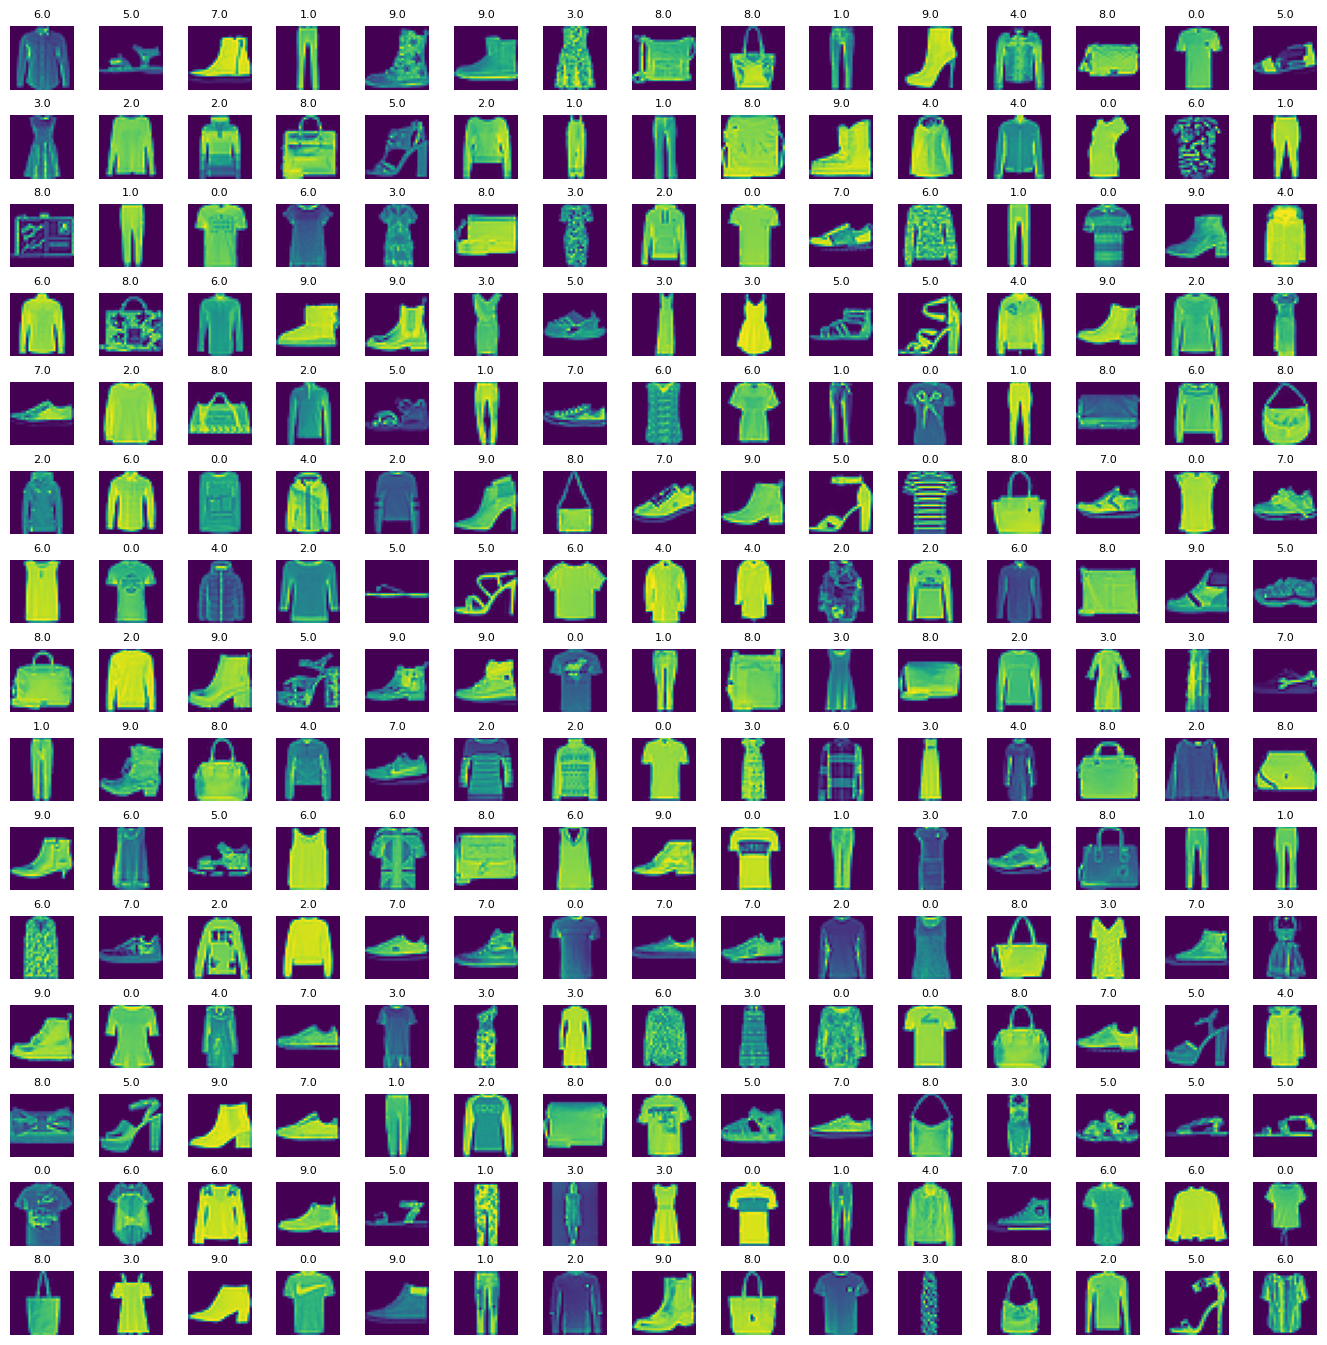

In [46]:
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [47]:
X_train = training[:, 1]/255
Y_train = training[:,0]

In [48]:
X_test = testing[:, 1]/255
Y_test = testing[:,0]

In [51]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 2)

In [67]:
X_train.shape

(38400,)

In [68]:
X_test.shape

(10000,)

In [71]:
X_train_1 = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test_1 = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate_1 = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

ValueError: cannot reshape array of size 38400 into shape (38400,28,28,1)

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [61]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

TypeError: Dense.__init__() missing 1 required positional argument: 'units'

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [ ]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

In [62]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [63]:
# Load Fashion MNIST datasets
fashion_train_df = pd.read_csv("/content/fashion-mnist_train.csv", sep=",")
fashion_test_df = pd.read_csv("/content/fashion-mnist_test.csv", sep=",")


In [64]:
# Display sample data
print("Training Data - Head:")
print(fashion_train_df.head())

print("\nTesting Data - Head:")
print(fashion_test_df.head())

print("\nTraining Data - Tail:")
print(fashion_train_df.tail())

print("\nTesting Data - Tail:")
print(fashion_test_df.tail())

Training Data - Head:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0       

In [65]:
# Check the shape of datasets
print("\nTraining Data Shape:", fashion_train_df.shape)
print("Testing Data Shape:", fashion_test_df.shape)


Training Data Shape: (60000, 785)
Testing Data Shape: (10000, 785)


In [72]:
# Convert datasets to numpy arrays
training = np.array(fashion_train_df, dtype="float32")
testing = np.array(fashion_test_df, dtype="float32")

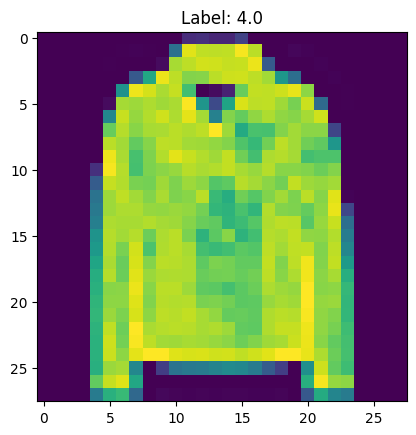

In [73]:
# Display a random image and its label
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
plt.title(f"Label: {label}")
plt.show()

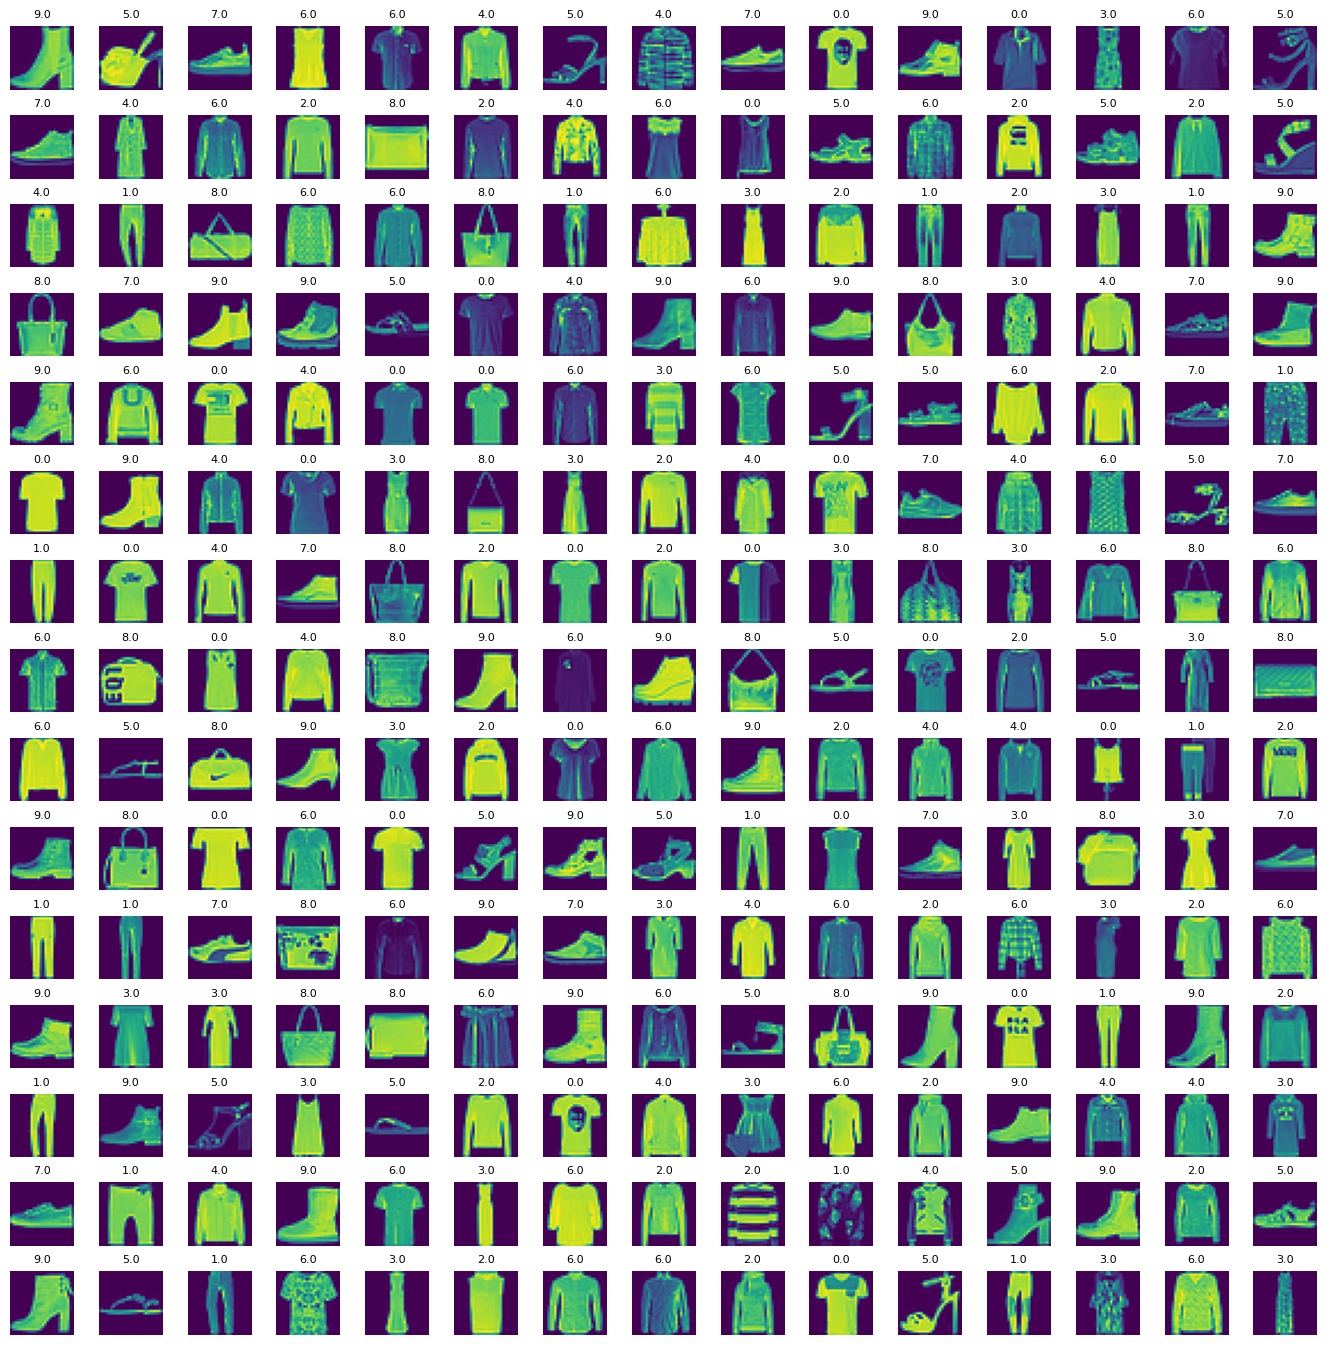

In [74]:
# Display a grid of random images from the training dataset
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28, 28)))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [75]:
# Preprocess and split the data
X_train = training[:, 1:] / 255
Y_train = training[:, 0]
X_test = testing[:, 1:] / 255
Y_test = testing[:, 0]

X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size=0.2, random_state=12345)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_validate = X_validate.reshape(X_validate.shape[0], 28, 28, 1)


In [76]:
# Build and compile the CNN model
cnn_model = Sequential()

cnn_model.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])



In [77]:
# Train the model
epochs = 50
history = cnn_model.fit(X_train, Y_train, batch_size=512, epochs=epochs, verbose=1, validation_data=(X_validate, Y_validate))



Epoch 1/50
94/94 [==============================] - 6s 48ms/step - loss: 1.2601 - accuracy: 0.5757 - val_loss: 0.7342 - val_accuracy: 0.7351
Epoch 2/50
94/94 [==============================] - 4s 38ms/step - loss: 0.6769 - accuracy: 0.7533 - val_loss: 0.6016 - val_accuracy: 0.7819
Epoch 3/50
94/94 [==============================] - 6s 65ms/step - loss: 0.5850 - accuracy: 0.7864 - val_loss: 0.5294 - val_accuracy: 0.8113
Epoch 4/50
94/94 [==============================] - 5s 50ms/step - loss: 0.5438 - accuracy: 0.8025 - val_loss: 0.5000 - val_accuracy: 0.8191
Epoch 5/50
94/94 [==============================] - 6s 69ms/step - loss: 0.5137 - accuracy: 0.8108 - val_loss: 0.4791 - val_accuracy: 0.8278
Epoch 6/50
94/94 [==============================] - 7s 71ms/step - loss: 0.4975 - accuracy: 0.8174 - val_loss: 0.4598 - val_accuracy: 0.8349
Epoch 7/50
94/94 [==============================] - 6s 63ms/step - loss: 0.4823 - accuracy: 0.8242 - val_loss: 0.4510 - val_accuracy: 0.8382
Epoch 8/50
94

In [78]:
# Evaluate the model on test data
evaluation = cnn_model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {evaluation[1]:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8771
Test Accuracy: 0.877


313/313 [==============================] - 4s 11ms/step


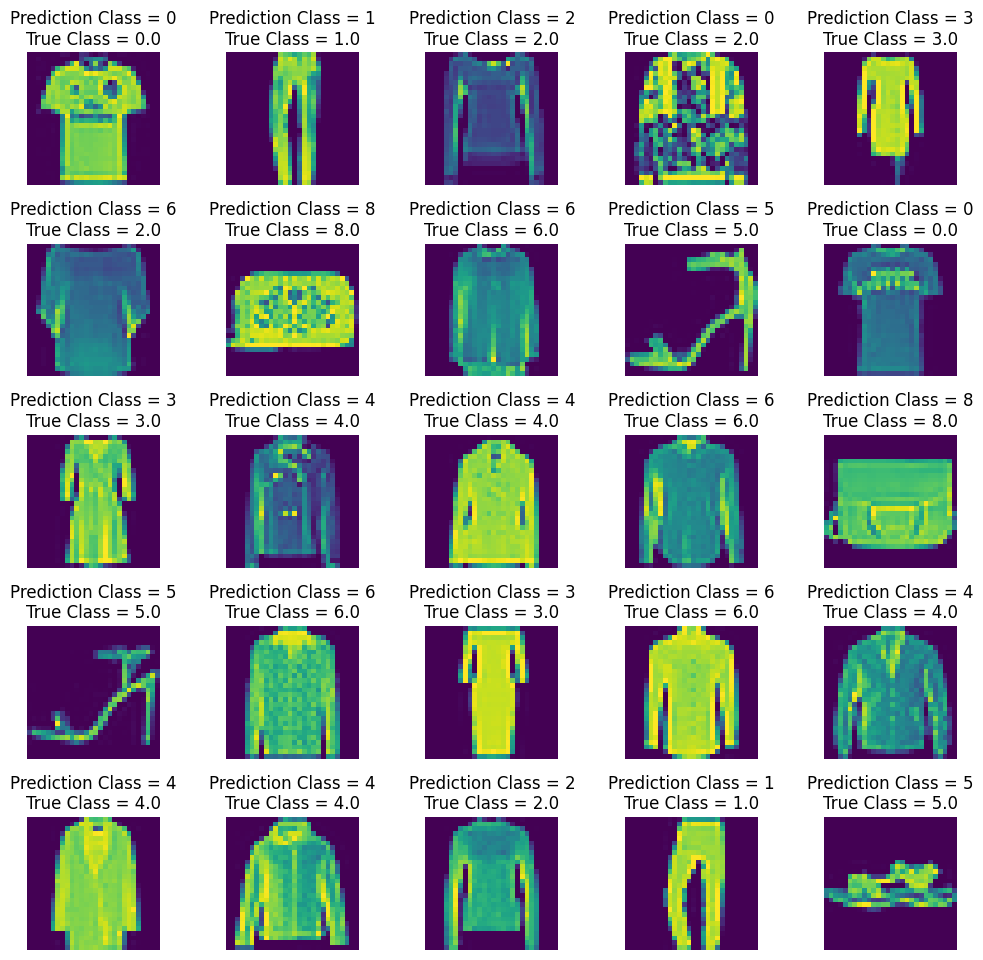

In [81]:
# Display a grid of predictions
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\nTrue Class = {Y_test[i]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.87      0.84      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.76      0.83      0.80      1000
     Class 3       0.89      0.90      0.89      1000
     Class 4       0.82      0.80      0.81      1000
     Class 5       0.96      0.95      0.96      1000
     Class 6       0.71      0.60      0.65      1000
     Class 7       0.94      0.91      0.92      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



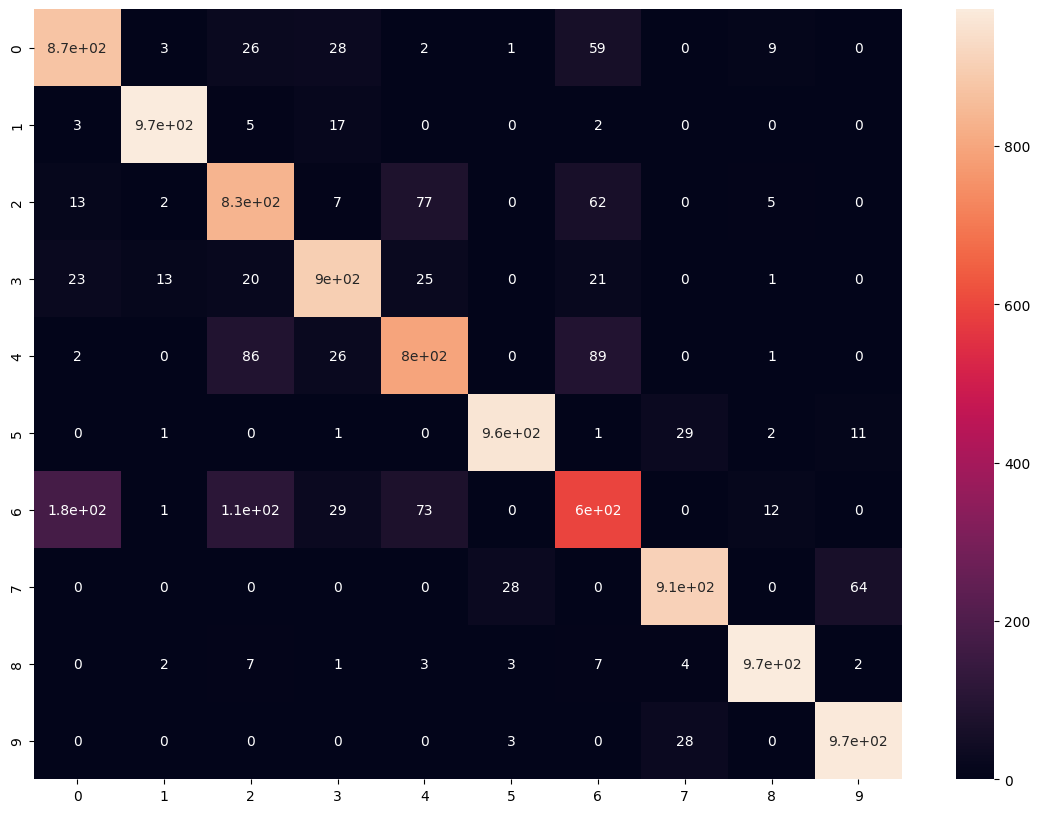

In [82]:
# Display confusion matrix and classification report
cm = confusion_matrix(Y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print("\nClassification Report:")
print(classification_report(Y_test, predicted_classes, target_names=target_names))